<a href="https://colab.research.google.com/github/yibesh/DeepLearning/blob/main/YoLo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_coco1282, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

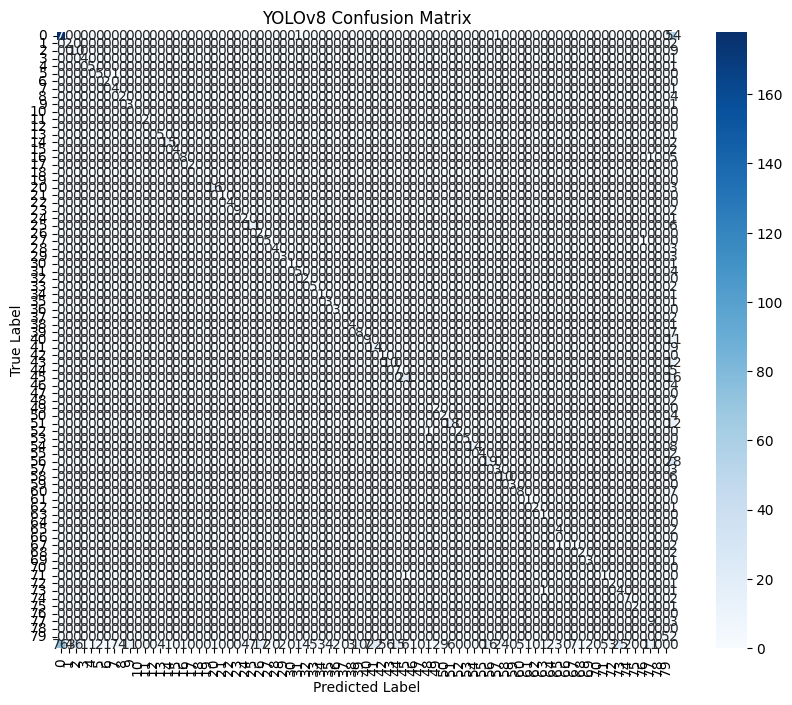


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 2 ties, 178.8ms
Speed: 3.1ms preprocess, 178.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict2


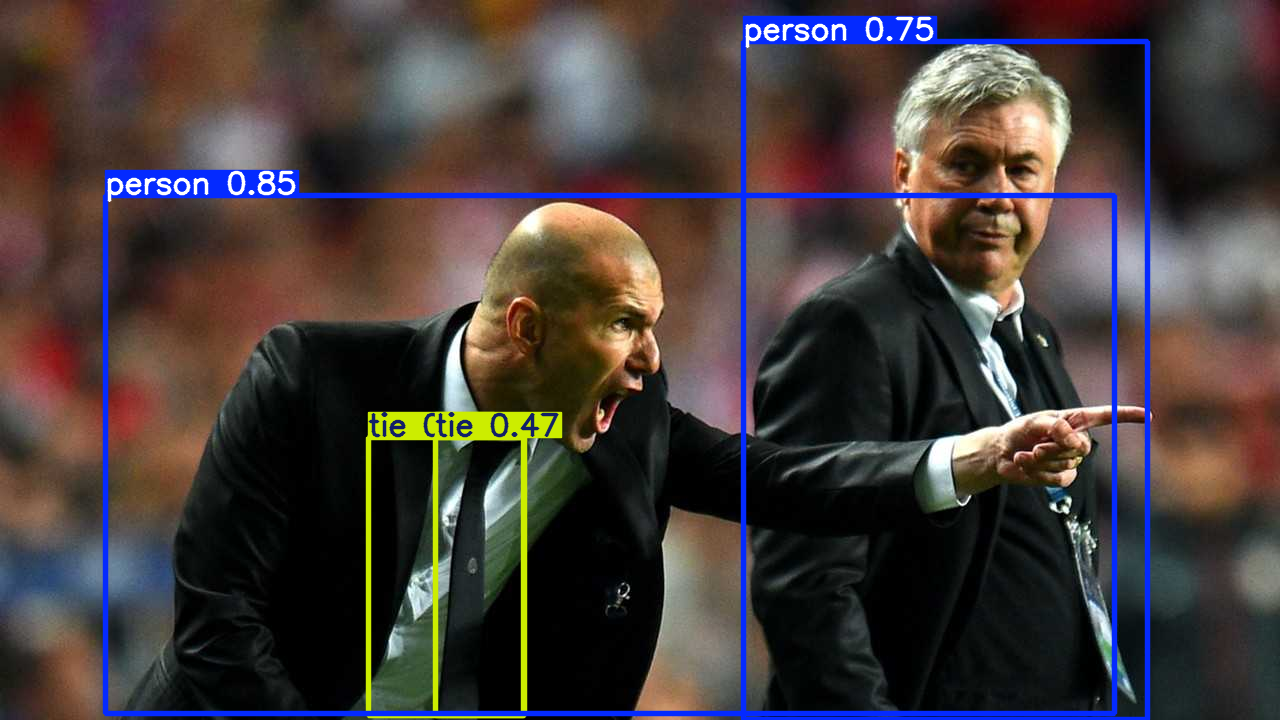

In [ ]:
# ============================================================
# YOLOv8 Object Detection with Confusion Matrix Evaluation
# ============================================================

!pip install ultralytics -q
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ============================================================
# 1️⃣ Load Pre-trained YOLOv8 Model
# ============================================================
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt or yolov8m.pt for larger models

# ============================================================
# 2️⃣ Train on a Real Dataset (example: COCO128)
# ============================================================
# The COCO128 dataset is a small real-image dataset for quick testing
# You can also replace it with your own dataset folder (images, labels)

model.train(
    data='coco128.yaml',   # Dataset config (included in YOLO)
    epochs=5,              # You can increase for better results
    imgsz=640,             # Image size
    batch=8,               # Batch size
    name='yolo_coco128'    # Project name
)

# ============================================================
# 3️⃣ Validation and Metrics
# ============================================================
metrics = model.val()  # Run validation
print(metrics)          # Print precision, recall, mAP, etc.

# ============================================================
# 4️⃣ Confusion Matrix Visualization
# ============================================================
# Extract confusion matrix data from validation results
cm = metrics.confusion_matrix.matrix  # YOLO provides this automatically
labels = metrics.names

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("YOLOv8 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ============================================================
# 5️⃣ Run Detection on a Real Image
# ============================================================
# Example image from dataset
results = model.predict(source='https://ultralytics.com/images/zidane.jpg', conf=0.25, save=True)

# Display detections
results[0].show()
